In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy import sparse
from scipy.sparse.linalg import svds
from scipy import linalg

import pyemb as eb

### Load data

Load primary school interactions dataset.

In [4]:
data = pd.read_csv('data/ia-primary-school-proximity-attr.edges',
                   sep=',', on_bad_lines='skip', header=None)
data.head()

0     1      2   3   4
0  1558  1567  31220  3B  3B
1  1560  1570  31220  3B  3B
2  1567  1574  31220  3B  3B
3  1632  1818  31220  4B  4B
4  1632  1866  31220  4B  4B

In [5]:
data.columns = ['V1', 'V2', 'T', 'L1', 'L2']
data['H'] = [int(int(t)/(60*60)) for t in list(data['T'])]
data['D'] = [int(int(t)/(60*60*24)) for t in list(data['T'])]
data['T1'] = [str(10*int(i/24) + i%24 - 8) for i in list(data['H'])]

data.head()

V1    V2      T  L1  L2  H  D T1
0  1558  1567  31220  3B  3B  8  0  0
1  1560  1570  31220  3B  3B  8  0  0
2  1567  1574  31220  3B  3B  8  0  0
3  1632  1818  31220  4B  4B  8  0  0
4  1632  1866  31220  4B  4B  8  0  0

In [6]:
id_dict = {}
for i in range(len(data)):
    if data['V1'][i] not in id_dict:
        id_dict[data['V1'][i]] = data['L1'][i]
    if data['V2'][i] not in id_dict:
        id_dict[data['V2'][i]] = data['L2'][i]

Make the unfolded adjacency matrix with attributes.

In [8]:
A, attributes = eb.preprocessing.matrix_and_attributes(data, ['V1', 'V2'], dynamic_col='T1', join_token='::')

1it [00:00, 13.25it/s]


### UASE

Embed the unfolded adjacency matrix into $d = 10$ dimensions selected using a scree plot of the singular values. Also construct the degree corrected embedding.

In [9]:
d = 10
embedding = eb.embedding.embed(A, d = d, right_embedding=True)
LHS = embedding[0]
RHS = embedding[1]

LHS_DC = eb.embedding.degree_correction(LHS)
RHS_DC = eb.embedding.degree_correction(RHS)

NameError: name 'zero_matrix' is not defined

In [ ]:
eb.tools.test_func()

AttributeError: module 'pyemb.tools' has no attribute 'test_func'

### Visualise embedding

Generate plotting colours and markers using the school class for each student, treating teachers as their own separate group.

In [7]:
import matplotlib as mpl

colours = np.array(list(mpl.colors.TABLEAU_COLORS.keys())[0:6])
colours[5] = 'black'

Z_classes = np.array([{'1A': 0, '1B': 1, '2A': 2, '2B': 3, '3A': 4, '3B': 5, '4A': 6,
                     '4B': 7, '5A': 8, '5B': 9, 'Teachers': 10}[id_dict[node_id]] for node_id in id_dict])
Z_colours = np.array([colours[{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, 'T': 5}[
                     id_dict[node_id][0]]] for node_id in id_dict])
Z_markers = np.array([{'A': 'o', 'B':'^', 'e':'s'}[id_dict[node_id][1]] for node_id in id_dict])

In [8]:
fig = plt.figure()
handles = [plt.scatter([], [], color='tab:blue', marker='o', s=12, label='Class 1A'),
           plt.scatter([], [], color='tab:blue',
                       marker='^', s=12, label='Class 1B'),
           plt.scatter([], [], color='tab:orange',
                       marker='o', s=12, label='Class 2A'),
           plt.scatter([], [], color='tab:orange',
                       marker='^', s=12, label='Class 2B'),
           plt.scatter([], [], color='tab:green',
                       marker='o', s=12, label='Class 3A'),
           plt.scatter([], [], color='tab:green',
                       marker='^', s=12, label='Class 3B'),
           plt.scatter([], [], color='tab:red',
                       marker='o', s=12, label='Class 4A'),
           plt.scatter([], [], color='tab:red',
                       marker='^', s=12, label='Class 4B'),
           plt.scatter([], [], color='tab:purple',
                       marker='o', s=12, label='Class 5A'),
           plt.scatter([], [], color='tab:purple',
                       marker='^', s=12, label='Class 5B'),
           plt.scatter([], [], color='black', marker='s', s=12, label='Teacher')]
plt.close()

Plot the right UASE embedding and the degree corrected version for every time window.

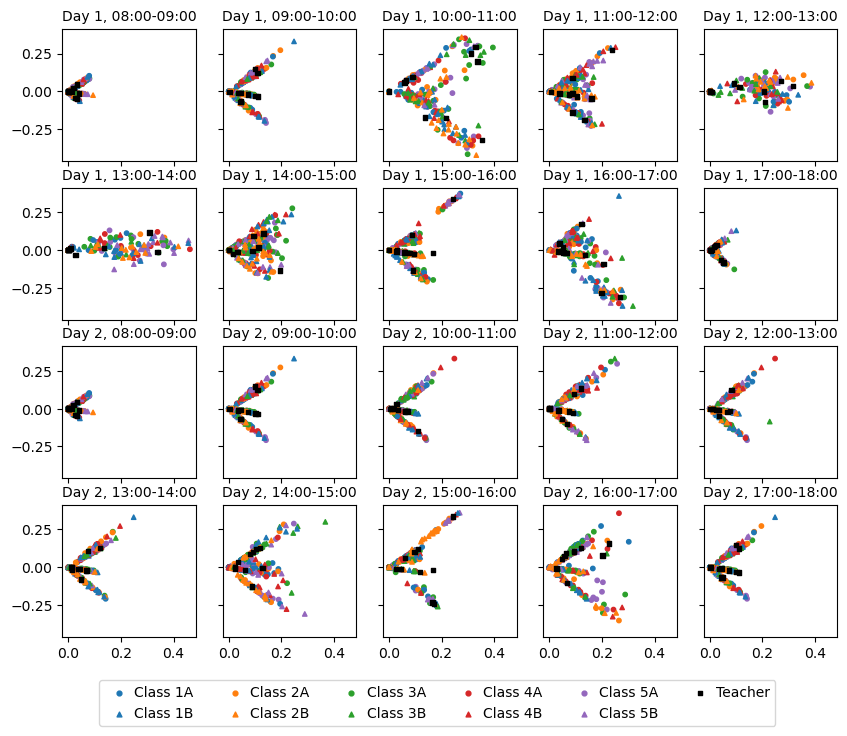

In [9]:
fig, axs = plt.subplots(4, 5, figsize=(10.0, 8.0), sharex=True, sharey=True)

T = len(data['T1'].unique())

for t in range(T):
    Y  = rs.select(RHS, attributes[1], {'time': str(t)})[0]
    for m in ('o','^','s'):
        idx = np.where(Z_markers == m)[0]
        axs[np.divmod(t,5)].scatter(Y[idx, 0], Y[idx, 1], marker=m, s=10, c=Z_colours[idx])

    axs[np.divmod(t,5)].set_title('Day ' + str(int(t/10)+1) + ', ' + str(t % 10+8).zfill(2) + 
                                  ':00-' + str(t % 10+9).zfill(2) + ':00', fontsize=10)

fig.legend(handles=handles, bbox_to_anchor=(0.5, 0), loc='lower center',
           ncol=6, fancybox=True, fontsize=10, handletextpad=0.1)
plt.subplots_adjust(bottom=0.12)

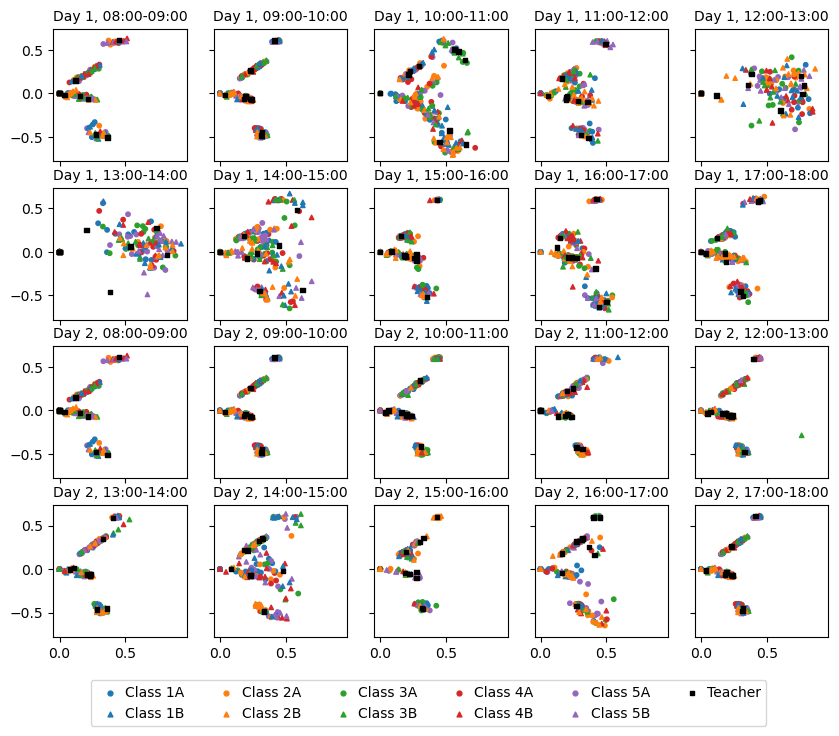

In [10]:
fig, axs = plt.subplots(4, 5, figsize=(10.0, 8.0), sharex=True, sharey=True)

T = len(data['T1'].unique())

for t in range(T):
    Y  = rs.select(RHS_DC, attributes[1], {'time': str(t)})[0]
    for m in ('o','^','s'):
        idx = np.where(Z_markers == m)[0]
        axs[np.divmod(t,5)].scatter(Y[idx, 0], Y[idx, 1], marker=m, s=10, c=Z_colours[idx])

    axs[np.divmod(t,5)].set_title('Day ' + str(int(t/10)+1) + ', ' + str(t % 10+8).zfill(2) + 
                                  ':00-' + str(t % 10+9).zfill(2) + ':00', fontsize=10)

fig.legend(handles=handles, bbox_to_anchor=(0.5, 0), loc='lower center',
           ncol=6, fancybox=True, fontsize=10, handletextpad=0.1)
plt.subplots_adjust(bottom=0.12)

## Animated Plotting